# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [77]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2= \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [78]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [79]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [80]:
boston.data.shape

(506, 13)

In [81]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [82]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [83]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [84]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [85]:
print(boston.target.shape)

(506,)


In [86]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [87]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

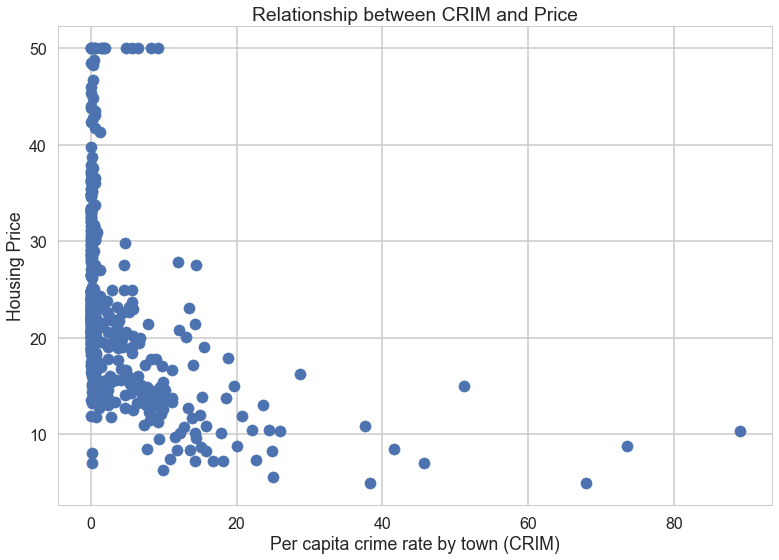

In [88]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

*your turn: describe relationship*  
From the plot presented above, we can make the following observations:  
 - The property value (PRICE) is negatively correlated with the crime rate (CRIM).
 - The relationship does not seem to be perfectly linear. Indeed for the crime rate value 0 to 20, the data seems to follow a linear relationship. However, as the crime rate increases (>40), the price of the property does not seem to be impacted and stagnates at low prices.
 - It seems that the set contains a few outliers. Indeed, the values with a price value at 50 and corresponding to a crime rate larger than 0 do not seem to follow the general trend.

For clarity, we display below the plot resulting from the fitting of the data using a linear regression method.

The regression seems to be governed by the large amount of data points in the low crime rate area, this cluster drives the regression slope to a large negative value. This leads to unrealistic prediction as the price of a proerty in an area with a crime rate greater than 60 will be predicted as negative.

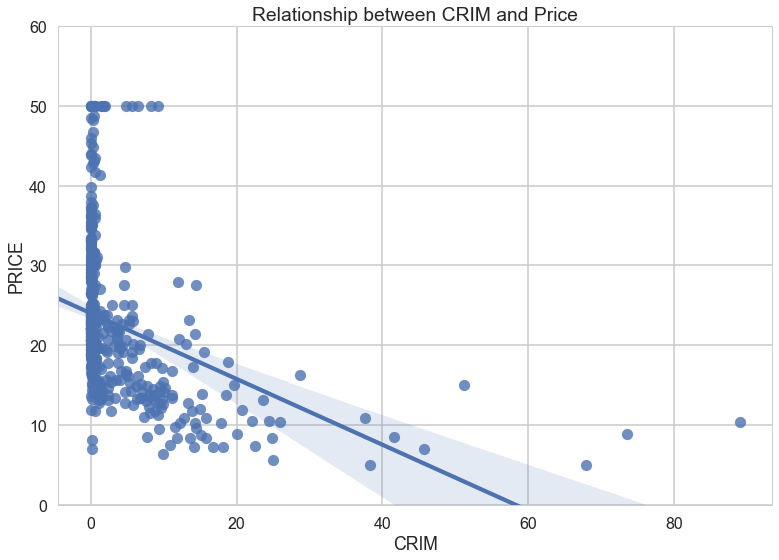

In [89]:
plt.figure()
sns.regplot(x="CRIM", y="PRICE", data=bos)
plt.ylim(0,60)
plt.title("Relationship between CRIM and Price")

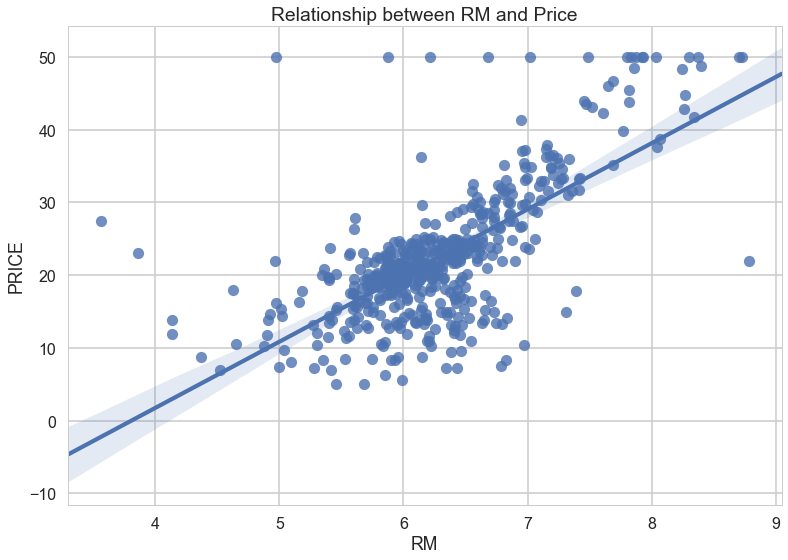

In [90]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure()
sns.regplot(x="RM", y="PRICE", data=bos)
plt.title("Relationship between RM and Price")

From the plot presented above, we can make the following observations:  
 - The property value (PRICE) is positively correlated with the average number of rooms (RM).
 - With the exception of a few outliers, the relationship is well modelled using a linear regression.
 - It seems that the set contains a few outliers. Indeed, several property with less than 8 rooms are assigned a large value. This can be explains by specific features in these properties (extra garages, locations, pools, roof decks, ...)

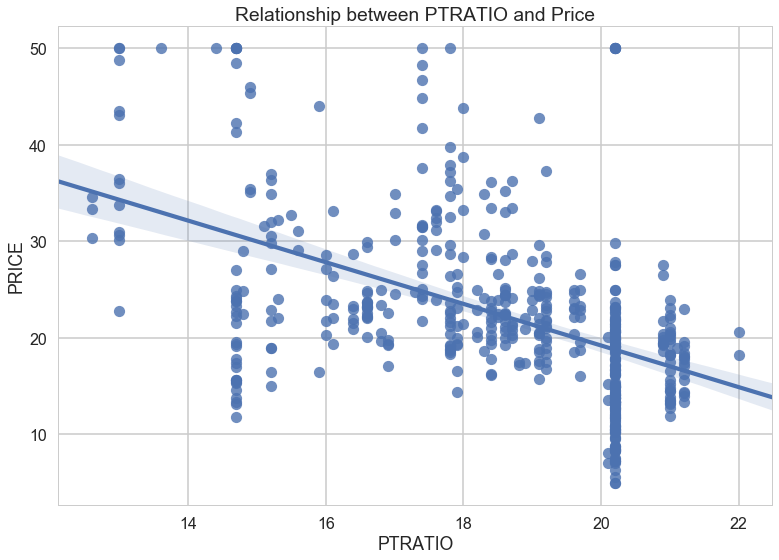

In [91]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure()
sns.regplot(x="PTRATIO", y="PRICE", data=bos)
plt.title("Relationship between PTRATIO and Price")

From the plot presented above, we can make the following observations:  
 - The property value (PRICE) is negatively correlated with the pupil-teacher ratio by town (PTRATIO).
 - The relationship seem to be linear, however, the data points are widely spread around the regression line.
 - It seems that the set contains a few outliers. A few property are assigned a price value of 50 while the pupil-teacher ratio of their neighborhoods is large.

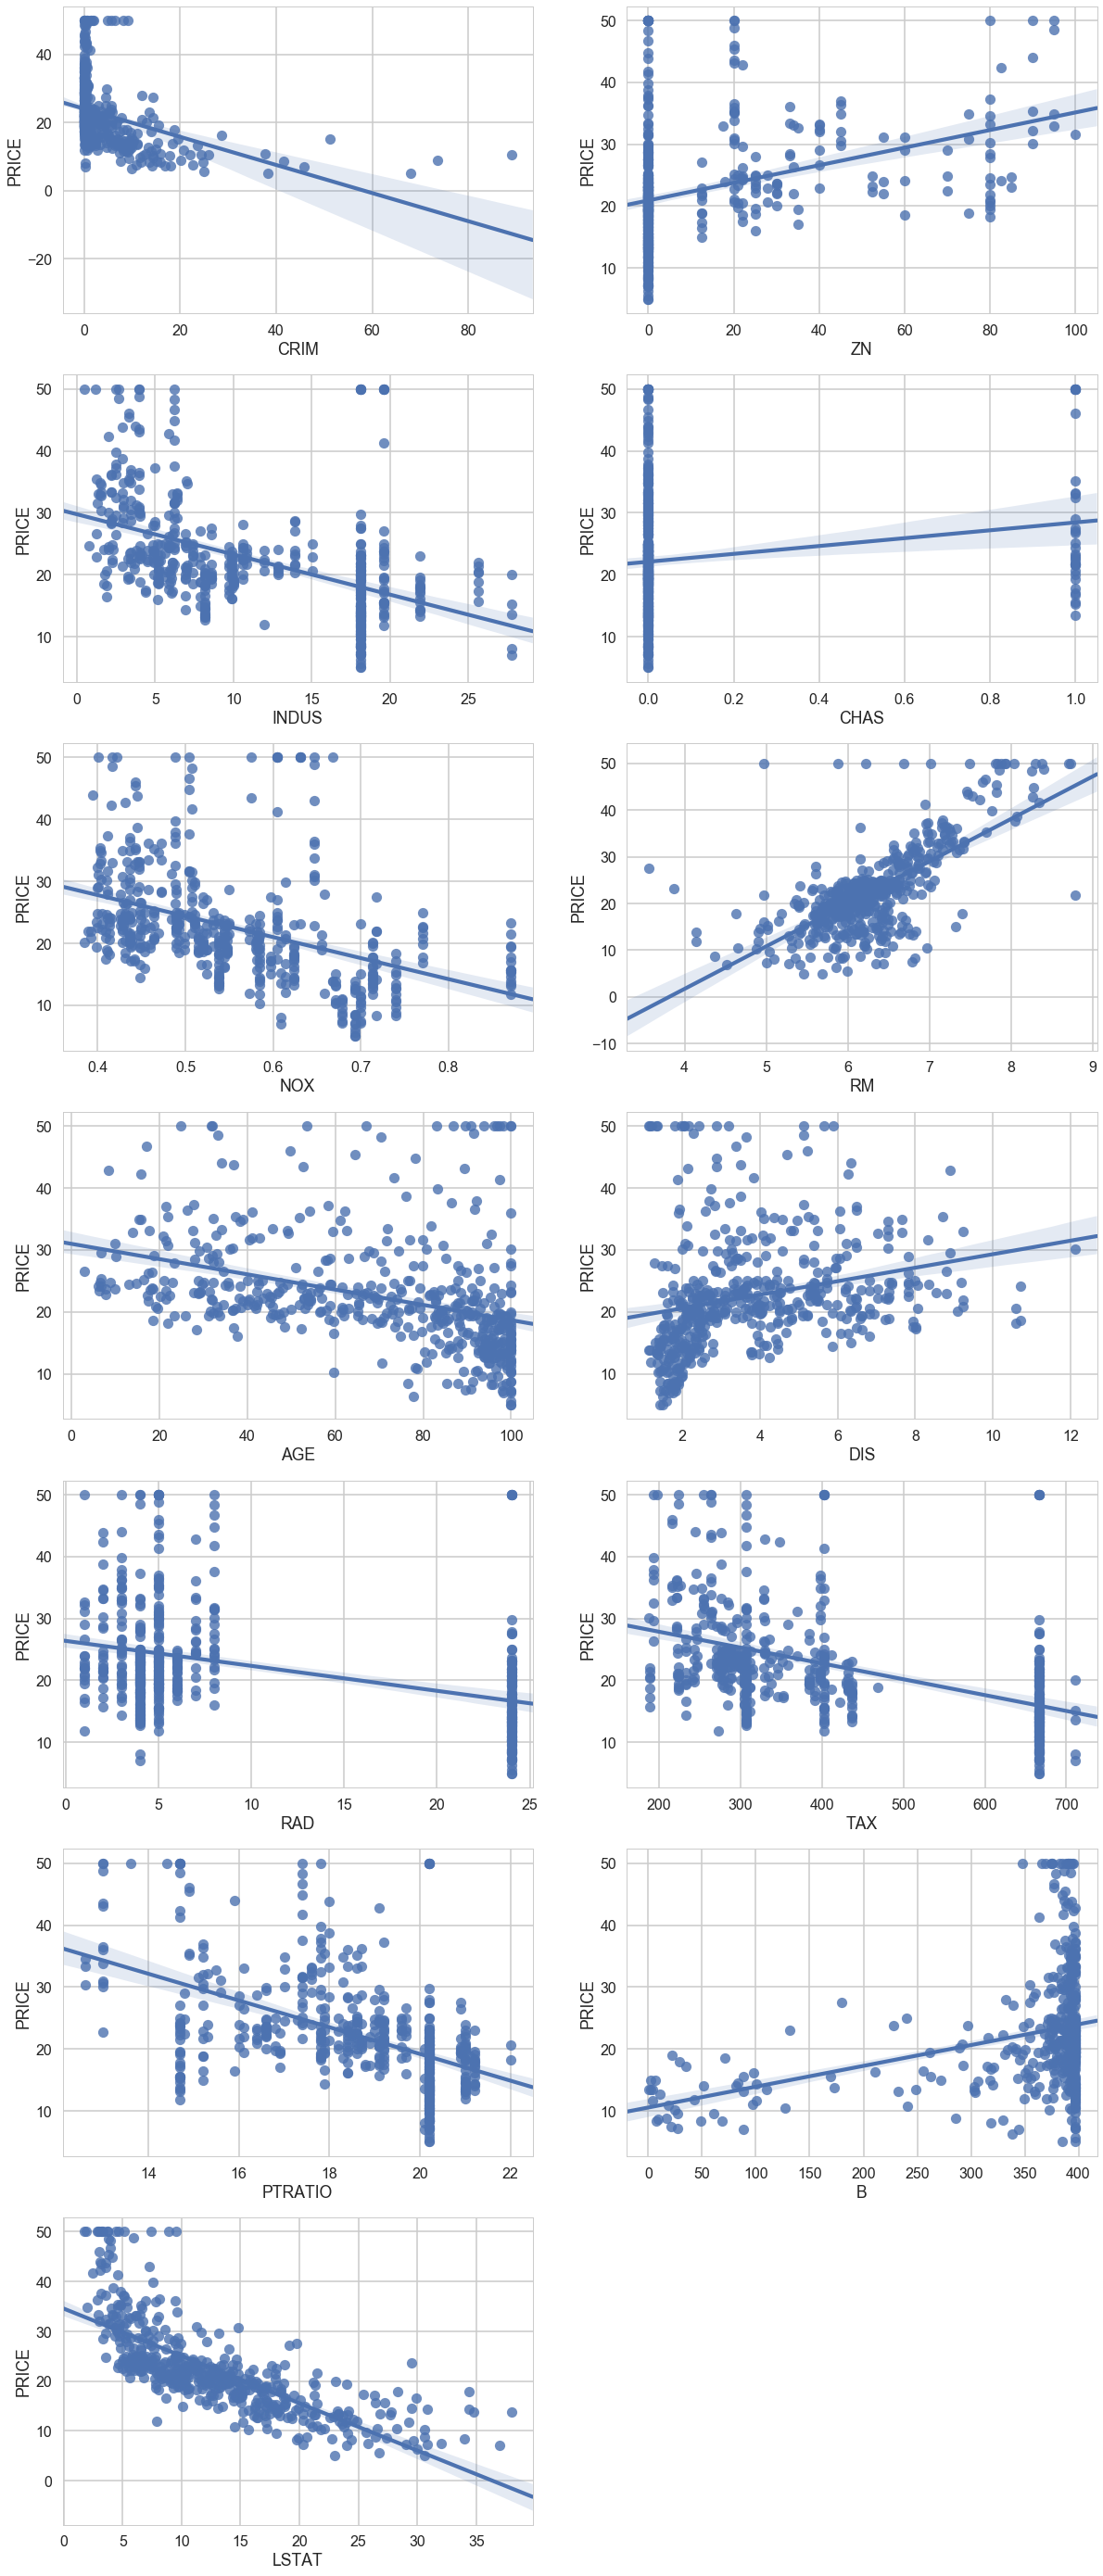

In [92]:
from pylab import *

# your turn: create some other scatter plots
feature_lst = bos.columns[0:-1]

n_row = 7
n_col = 2

fig, ax = plt.subplots(figsize=(20,50))

for r in range(len(feature_lst)):
        subplot(n_row,n_col,r+1)
        sns.regplot(x=feature_lst[r], y="PRICE", data=bos)

From the multiple plots shown above, the following observations can be made:

 - The following features cannot be related to the price feature using a linear relationship.
  - Accessibility to radial highways (RAD)
  - Full-value property tax rate (TAX)
  - B

 - The % lower status of the population feature (LSTAT) seems to be the best fit for a linear relationship with the pirce feature.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

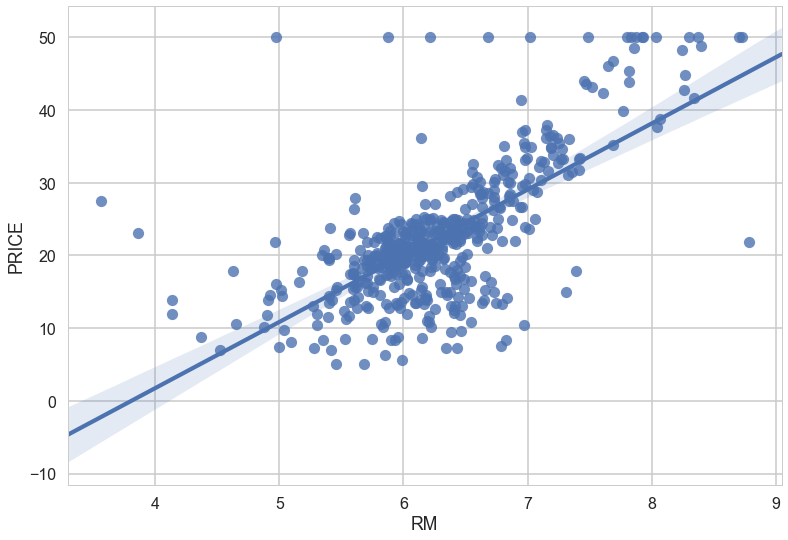

In [93]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


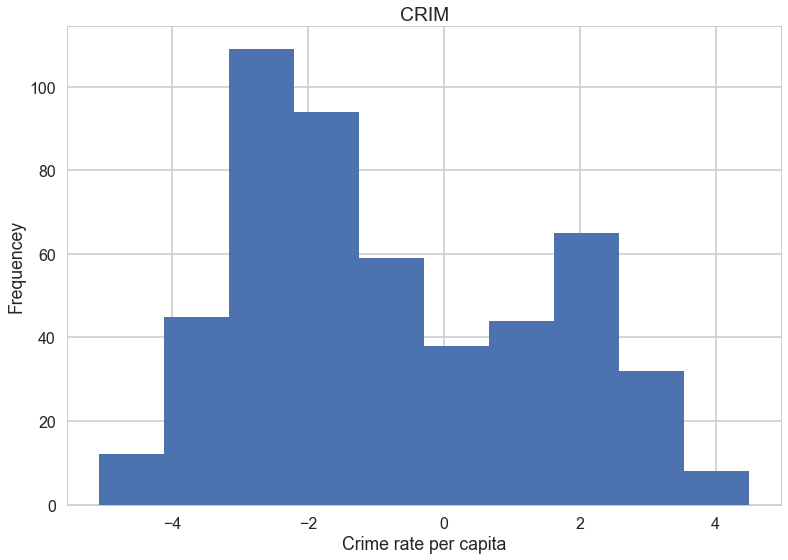

In [94]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

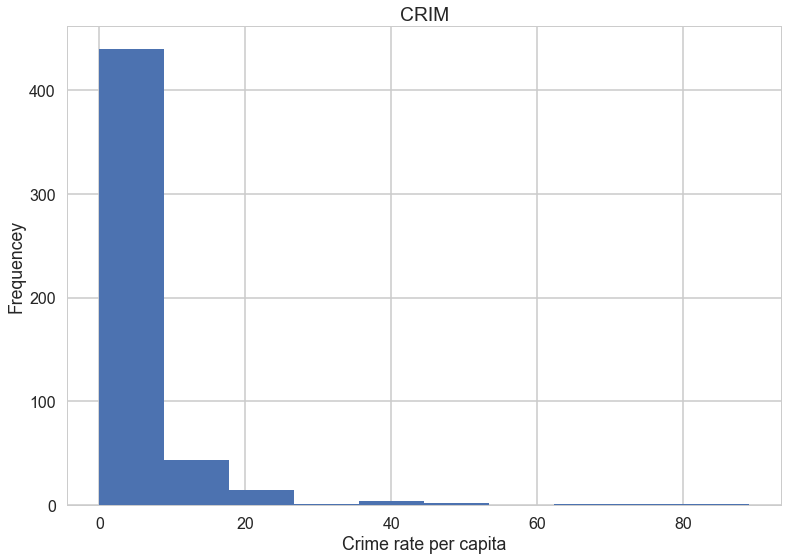

In [95]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

From the plot shown above, we can see that a large portion of the data points are contained in the first bin. Moreovr, the data set contains a few records with large value (>40). Because of the high concentration of data in the first bin and the wide range of the data, using a standard histogram can be misleading. Because of the nature of the observed feaature, using a logarithmic scale leads to a better visualization. Indeed, we can now look at the crime rate distribution in term of ratio between bins.

Moreover, using the logarithmic scale, we observe two peaks. The first peak corresponds to a crime rate of exp(-3)=5% and the second one to exp(2)=7.4%.

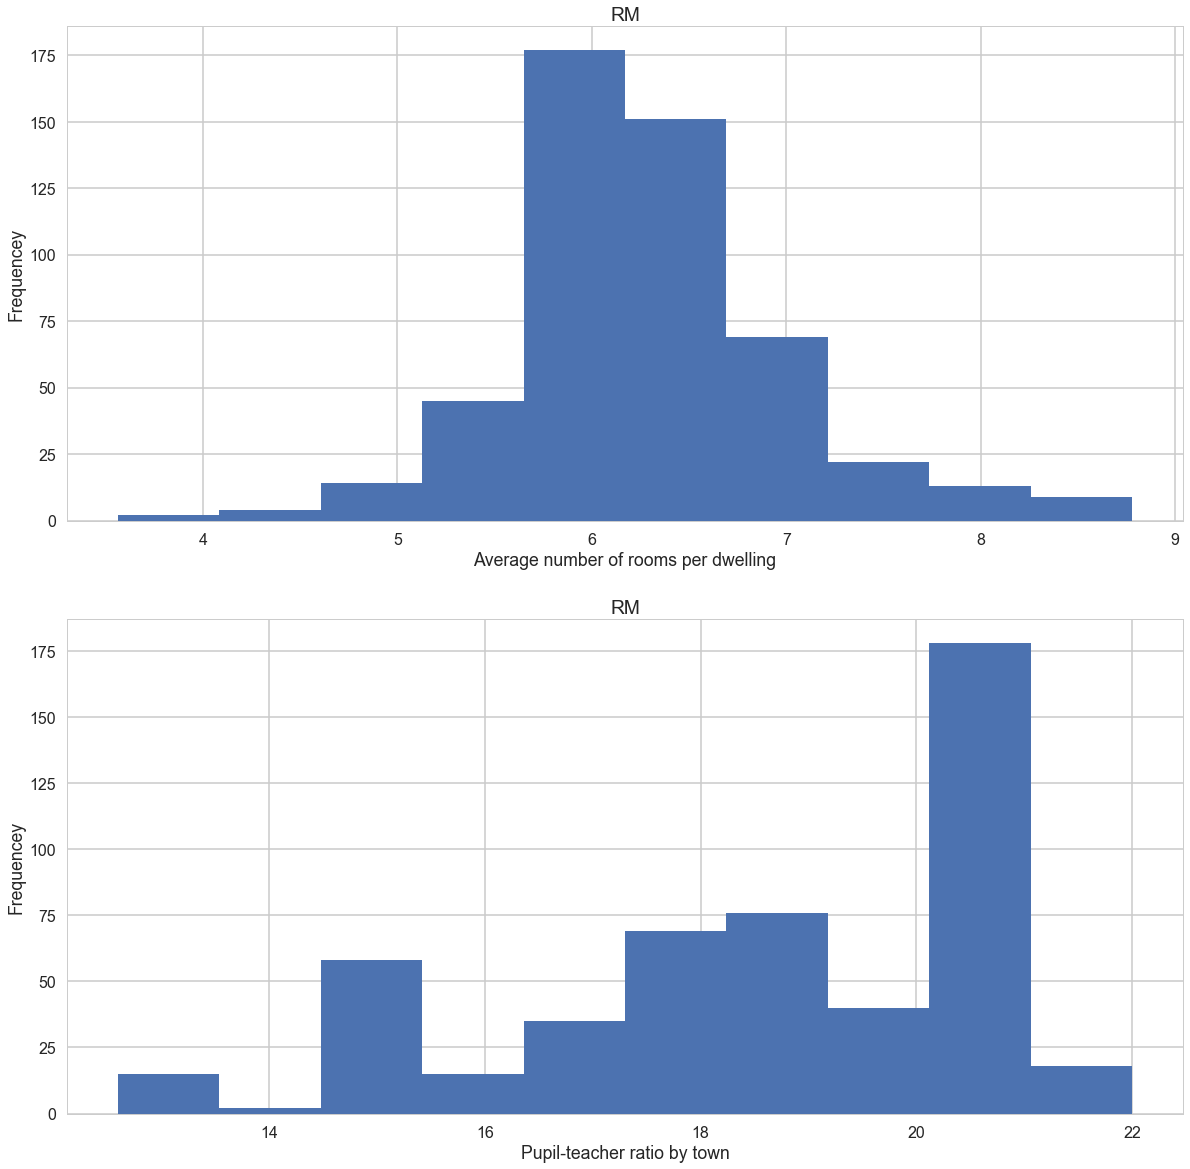

In [96]:
#your turn
fig, ax = plt.subplots(figsize=(20,20))

subplot(2,1,1)
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Frequencey")

subplot(2,1,2)
plt.hist(bos.PTRATIO)
plt.title("RM")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")

plt.show()

The pupil-teacher ratio does not seem to be normally distributed, the number of distribution for the average number of rooms seems to be normally distributed around a mean of ~6 rooms.

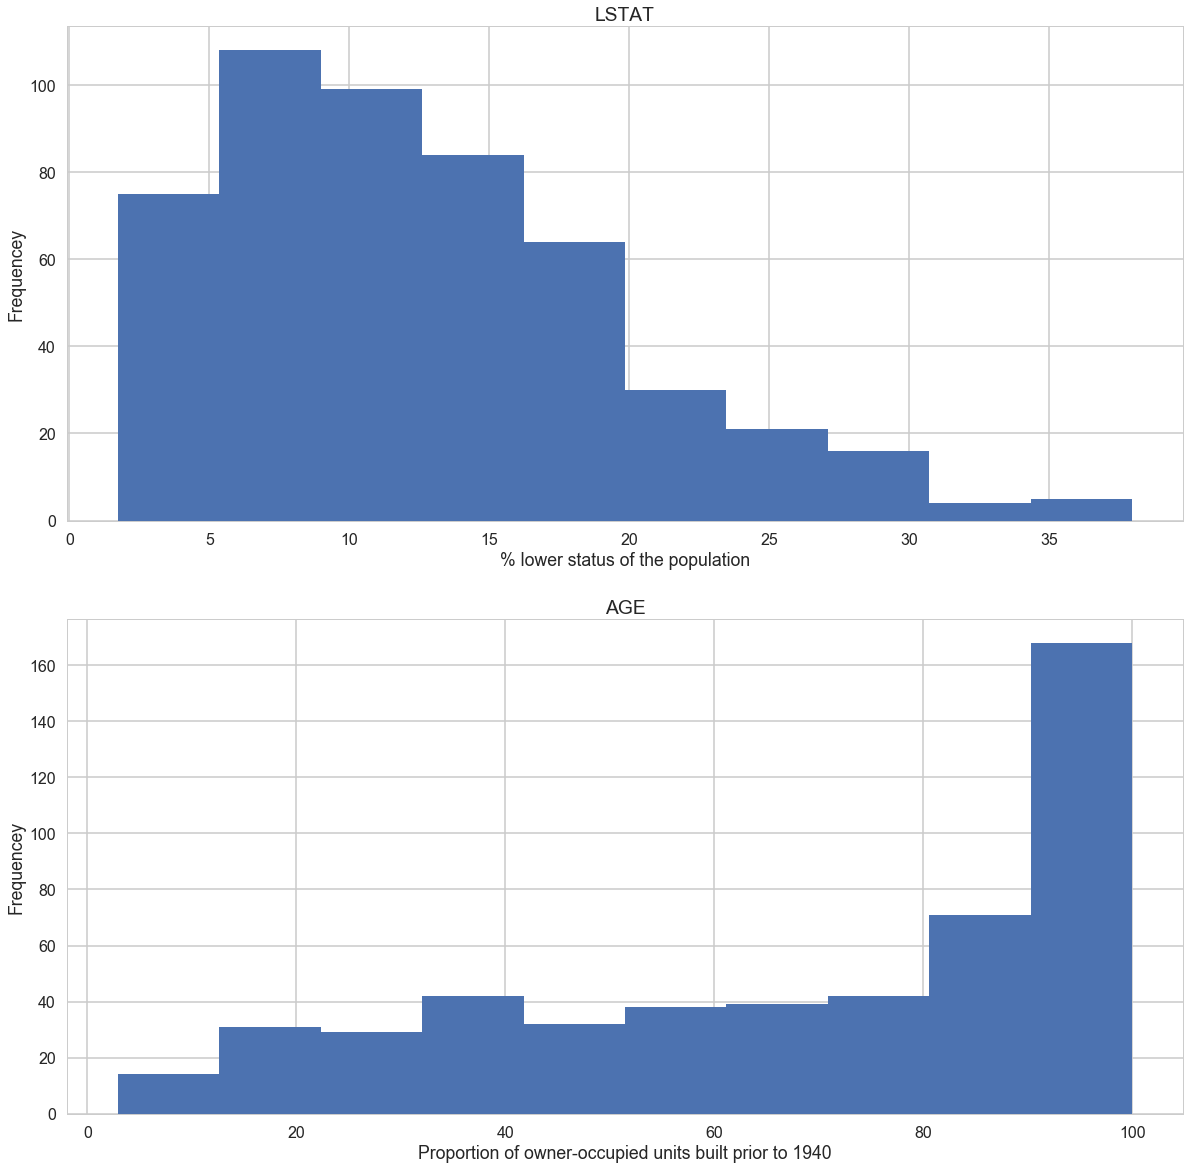

In [97]:
#your turn
fig, ax = plt.subplots(figsize=(20,20))

subplot(2,1,1)
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population")
plt.ylabel("Frequencey")

subplot(2,1,2)
plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Frequencey")

plt.show()

Neither the LSTAT nor the AGE feature seem to be normally distributed.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [98]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [99]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           2.49e-74
Time:                        17:06:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

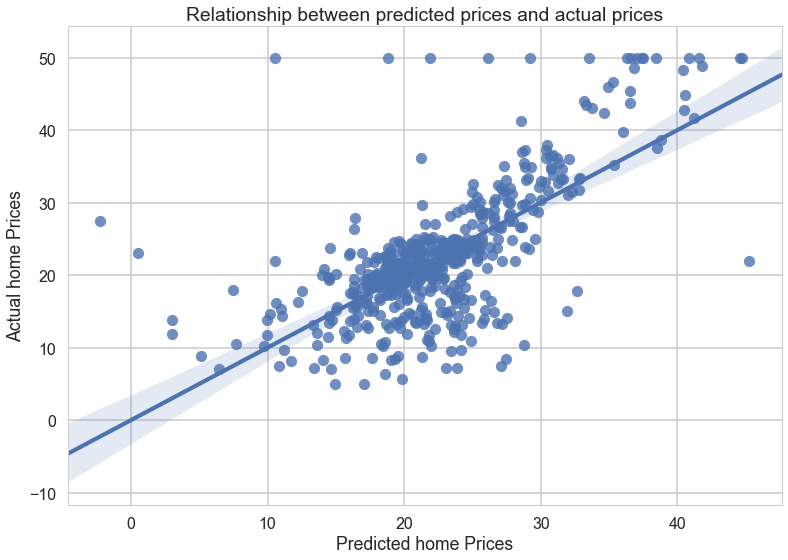

In [100]:
# your turn
scatter = sns.regplot(y=bos.PRICE, x=m.fittedvalues)
scatter.set( xlabel = "Predicted home Prices", ylabel = "Actual home Prices" )
plt.title("Relationship between predicted prices and actual prices");

In [101]:
slope,intercept = np.polyfit(m.fittedvalues,bos.PRICE,deg=1)
print("Slope:",slope)
print("Intercept",intercept)

Slope: 1.0
Intercept 0.0


Eventhough the sets contains apparent outliers, there is a clear relationship as depicted by the results of the linear fitting (Slope: 1.0, Intercept: 0.0). This simple model (univariable regression) produces good results, it might be feasable to capture the outliers by including more variables into the model.

### Fitting Linear Regression using `sklearn`


In [102]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [103]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [104]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>

**INTERCEPT**

In order to remove the intercept from the model, we would have to define the LinearRegression object fit_intercept property to False.   

*lm.fit_intercept=False*  
 
This choice is based on the nature of the problem. In our case, we are trying to predict the value of a property based on the average number of rooms. Let's considered the problem from a purely mathematical point of view, for a property with 0 room, we would like the price to be predicted as 0 since the property does not exists. Becuase of the imperfect nature of the distribution of our date, the fitting of the model using a linear regression might result in a non-null intercept. In this case, it means that a house with no room will be assigned as non-null value.

**RESIDUALS**
If our residuals are normally distributed, we have a necessary but not sufficient condition. In fact, we need the mean of the residuals to be normally distributed with a mean of 0. If thea mean of our residuals is not close to zero then our linear fitting is not optimal and maybe there is a better polinomial form to be used.

**Y NORMALLY DISTRIBUTED?**
No, Y does not need to be normally distributed. The normal distribution assumption is used to preform predictions (confidence intervals,...).

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [105]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [106]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [107]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [108]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

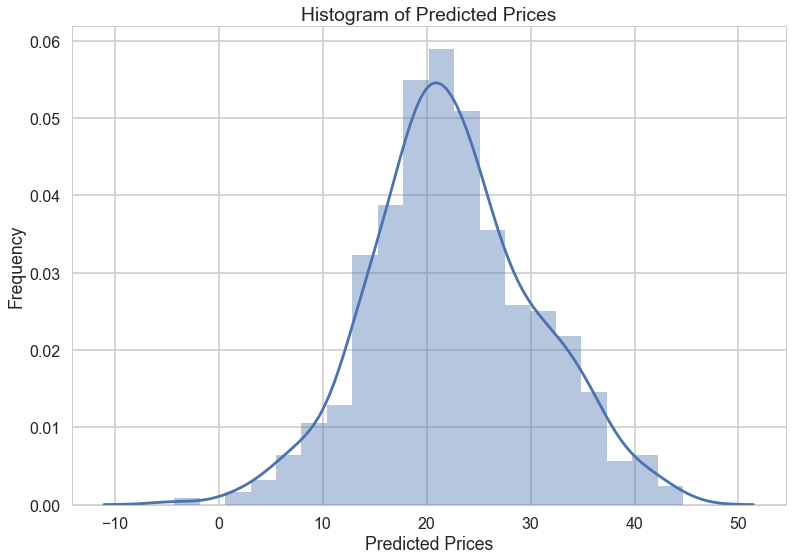

In [109]:
# your turn
sns.distplot(lm.predict(X))
plt.title("Histogram of Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

In [110]:
print("Mean of predicted prices:", np.mean(lm.predict(X)))
print("Standard deviation of predicted prices:", np.std(lm.predict(X)))

Mean of predicted prices: 22.5328063241
Standard deviation of predicted prices: 7.90707132499


From the above plot, we can make the following observations:
 - The predicted data seems to be normally distributed around a mean value of 22.53.
 - The standard deviation is estimated to 7.91.
 - There are several outliers located in the bin with a negative value (-2).

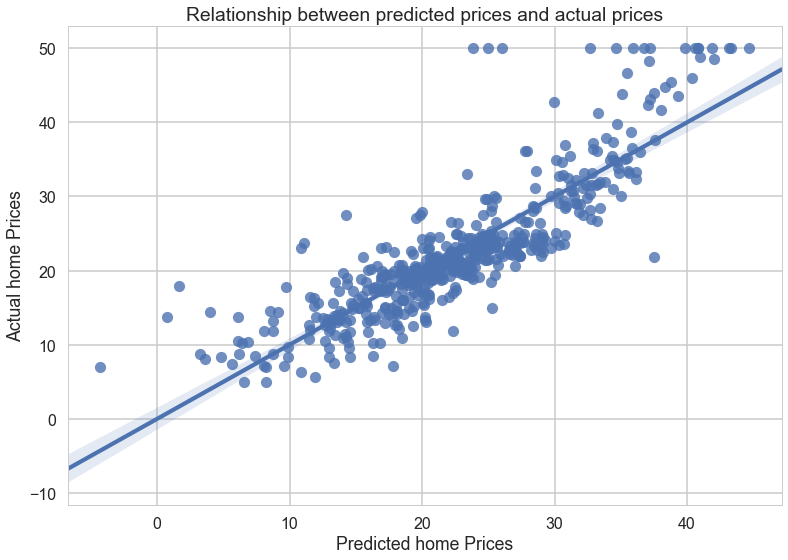

In [111]:
scatter = sns.regplot(y=bos.PRICE, x=lm.predict(X))
scatter.set( xlabel = "Predicted home Prices", ylabel = "Actual home Prices" )
plt.title("Relationship between predicted prices and actual prices");

In [112]:
slope,intercept = np.polyfit(lm.predict(X),bos.PRICE,deg=1)
print("Slope:",slope)
print("Intercept",intercept)

Slope: 1.0
Intercept 1.20537814083e-12


Based on the results and the use of the two models (statsmodel and scikit-learn), we can say that the statsmodel gives more control to the user to defined its model using a simple string command ("PRICE ~ RM"). It also provides a larger set of useful statistical parameters used to assess the quality of the model.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [113]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [114]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31636.0191309


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{N-K-1}$$
$$MSR = \frac{RSS}{K}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1-R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [115]:
# Linear regression between the PTRATIO and the PRICE
lm = LinearRegression()
lm.fit(bos[['PTRATIO']], bos.PRICE)

y_pred = lm.predict(bos[['PTRATIO']])

print("Slope:",lm.coef_[0])
print("Intercept:",lm.intercept_)

Slope: -2.15717529606
Intercept: 62.3446274748


From the results above, an increse in 1 percent of the PTRATIO will decrease the price of 2.16.

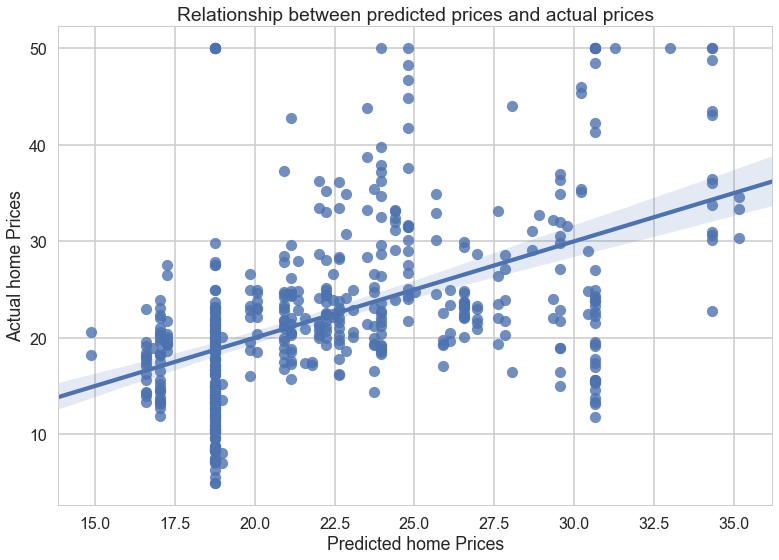

In [116]:
scatter = sns.regplot(y=bos.PRICE, x=y_pred)
scatter.set( xlabel = "Predicted home Prices", ylabel = "Actual home Prices" )
plt.title("Relationship between predicted prices and actual prices");

In [117]:
# Compute the R^2 value
from sklearn.metrics import r2_score

ESS = np.sum((y_pred - np.mean(bos.PRICE)) ** 2)
RSS = np.sum((bos.PRICE - y_pred) ** 2)

R2 = r2_score(bos.PRICE.values,y_pred)
print("R^2 score:",R2)

R^2 score: 0.257847318009


From the value of the $R^2$, we can conclude that 25.8% of the variance in the response variable can be explained by the linear regression model.

In [118]:
# Parameters
N = bos.shape[0]
K = 1

In [119]:
# Compute F-statistic option 2
F = (R2)/(1-R2)*(N-K-1)/K
print("N:",N)
print("K:",K)
print("F-statistic:",F)

N: 506
K: 1
F-statistic: 175.105542876


We have the following hypothesis testing related to our regression:

 - Null hypothesis: The fit of the intercept-only model and your model are equal.
 - Alternative hypothesis: The fit of the intercept-only model is significantly reduced compared to your model.

In [120]:
import scipy

df1=N-K-1
df2=K

print("p-value",scipy.stats.f.sf(F, df1, df2))

p-value 0.0602088962324


Based on the p-value shown above, we cannot reject the null-hypothesis and conclude that the fit of the intercept-only model and your model are equal.

By definition, the F-statistic is equal to the square of the t-statistic.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [121]:
# your turn
lm3 = LinearRegression(normalize=True)
lm3.fit(bos[['CRIM', 'RM','PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [122]:
# Make prediction
y_pred3 = lm3.predict(bos[['CRIM', 'RM','PTRATIO']])

# Compute the R^2 value
R2_3 = r2_score(bos.PRICE.values,y_pred3)
print("R^2 score:",R2_3)

R^2 score: 0.593414155114


In [123]:
# Compute F-statistic
N3 = bos.shape[0]
K3 = 3
F3 = (R2_3)/(1-R2_3)*(N3-K3-1)/K3
print("N:",N3)
print("K:",K3)
print("F-statistic:",F3)

N: 506
K: 3
F-statistic: 244.223870239


In [124]:
# Hypothesis testing: F-test
df1=N3-K3-1
df2=K3

print("p-value",scipy.stats.f.sf(F3, df1, df2))

p-value 0.000361290957158


Based on the p-value shown above, we cannot reject the null-hypothesis and conclude that the fit of the intercept-only model and your model are equal.

From the value of the $R^2$, we can conclude that 59.3% of the variance in the response variable can be explained by the linear regression model.

In [125]:
print(lm3.coef_)

[-0.20210971  7.3815667  -1.0741868 ]


From the coefficients shown above, it seems that the number of rooms plays a large role in increasing the price of a property. Note that the coeficients can only be compared if the data has been normalized. Then, the PTRATIO has the maximum effect in reducing the prince of a property.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [126]:
# We add the LSTAT and the INDUS features to our model
lm4 = LinearRegression(normalize=True)
lm4.fit(bos[['CRIM', 'RM','PTRATIO','LSTAT','INDUS']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [127]:
# Make prediction
y_pred4 = lm4.predict(bos[['CRIM', 'RM','PTRATIO','LSTAT','INDUS']])

# Compute the R^2 value
R2_4 = r2_score(bos.PRICE.values,y_pred4)
print("R^2 score:",R2_4)

R^2 score: 0.681545511994


In [128]:
# Compute F-statistic
N4 = bos.shape[0]
K4 = 5
F4 = (R2_4)/(1-R2_4)*(N4-K4-1)/K4
print("N:",N4)
print("K:",K4)
print("F-statistic:",F4)

N: 506
K: 5
F-statistic: 214.016613885


In [129]:
# Hypothesis testing: F-test
df1=N4-K4-1
df2=K4

print("p-value",scipy.stats.f.sf(F4, df1, df2))

p-value 4.43348432454e-06


In [130]:
# We now compare the two models using combined F-value
RSS_reduced =  np.sum((bos.PRICE - y_pred3) ** 2)
RSS_full = np.sum((bos.PRICE - y_pred4) ** 2)
DF_reduced = N3-K3-1
DF_full= N4-K4-1

F_combined = (RSS_reduced-RSS_full)/((DF_reduced-DF_full))/(RSS_full/DF_full)
print("F-value:",F_combined)

F-value: 69.18677566171546


In [131]:
# Compute the AIC

m = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m.summary())

m = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT + INDUS',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.09e-97
Time:                        17:06:25   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

Since the second model has a slightly lower AIC value, it is a better fit to the first model with only three variables.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

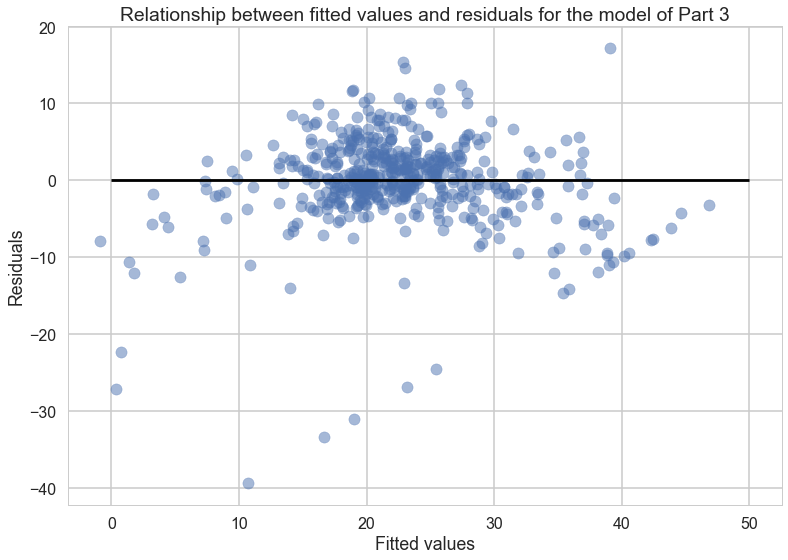

In [132]:
# Your turn.

# Generate residuals
residuals_3 = y_pred3 - bos.PRICE.values

# Generate plot
plt.scatter(y_pred3, residuals_3,alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Relationship between fitted values and residuals for the model of Part 3")
plt.hlines(y = 0, xmin=0, xmax = 50)

There seems to be a general trend, the residual plot seem to be mostly negative for large (>30) and small (<10) values of the fitted set. This goes against the random distribution of the residuals. Maybe a linear regression of a higher degree could limit this effect.

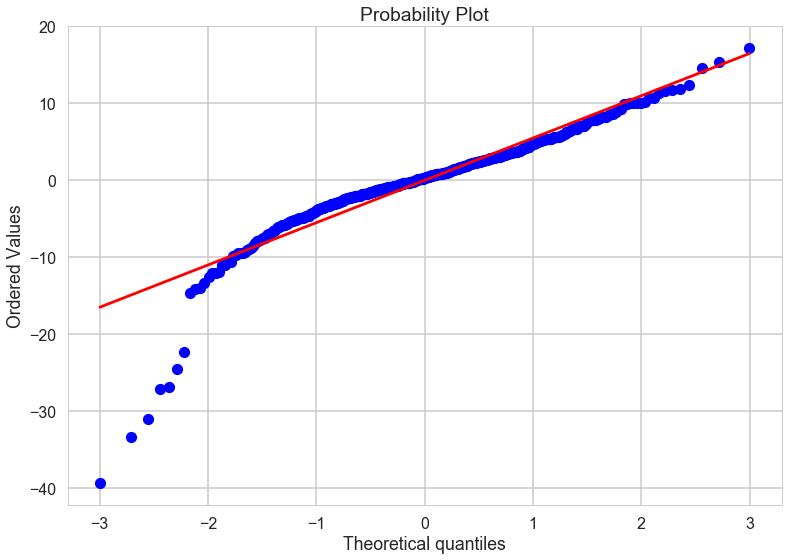

In [133]:
import pylab 
stats.probplot(residuals_3, dist="norm", plot=pylab)
pylab.show()

The plot shown above depicts the quantile-quantile relationship between the theoretical normal distribution and the residuals of our model. We can see that for the small quantiles, our model divergers from the normal distribution. This confirms that our residuals are not normally distributed.

The quantile-quantile plot does not leave much room for reading error. It is a quick and efficient tool to determine if a randomly distributed variable follows a normal distribution. However, there are some aspects of the regression that cannot be observe in a qq-plot. For instance, higher degree correlation (bell-shape distribution of the residuals) can only be observed using the fitted-values vs. residuals plot.

We have at least one outlier, there is on record with a negative predicted price. We will now investigate this specific record.

In [134]:
# Locate record
outlier = bos.loc[y_pred3<0,['CRIM', 'RM','PTRATIO']]
print(outlier)

        CRIM     RM  PTRATIO
414  45.7461  4.519     20.2


In [135]:
bos[['CRIM', 'RM','PTRATIO']].describe()

,CRIM,RM,PTRATIO
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,18.455534
std,8.596783,0.702617,2.164946
min,0.006320,3.561000,12.600000
25%,0.082045,5.885500,17.400000
50%,0.256510,6.208500,19.050000
75%,3.647423,6.623500,20.200000
max,88.976200,8.780000,22.000000


Our outlier record indicates the following that when added together lead to a imporper prediction:
 - Large crime rate: 45.75 for a 75% percentile of 3.65
 - Average number of room 4.52 for a median of 6.21
 - Average PTRATIO is also relatively high 20.2 corresponding to the 75% percentile. 
 
In conclusion, because of the large crime rate and PRATIO, this record is extremely penalized while it positively correlated feature (RM) is small. This explains the negative prediction.

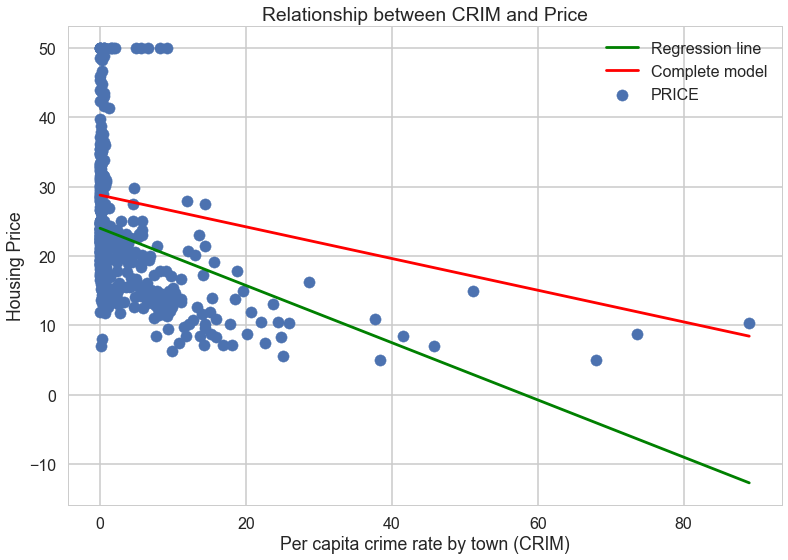

In [136]:
# CRIM
lm_CRIM = LinearRegression(normalize=True)
lm_CRIM.fit(bos[['CRIM']], bos.PRICE)

X = np.asarray([[np.min(bos.CRIM)],[np.max(bos.CRIM)]])
Y = lm_CRIM.predict(X)

Y_reg = [y_pred3[np.argmin(bos[['CRIM']].values)],y_pred3[np.argmax(bos[['CRIM']].values)]]

plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.plot(X,Y,color='green',label='Regression line')
plt.plot(X,Y_reg,color='red',label='Complete model')
plt.legend()

plt.show()

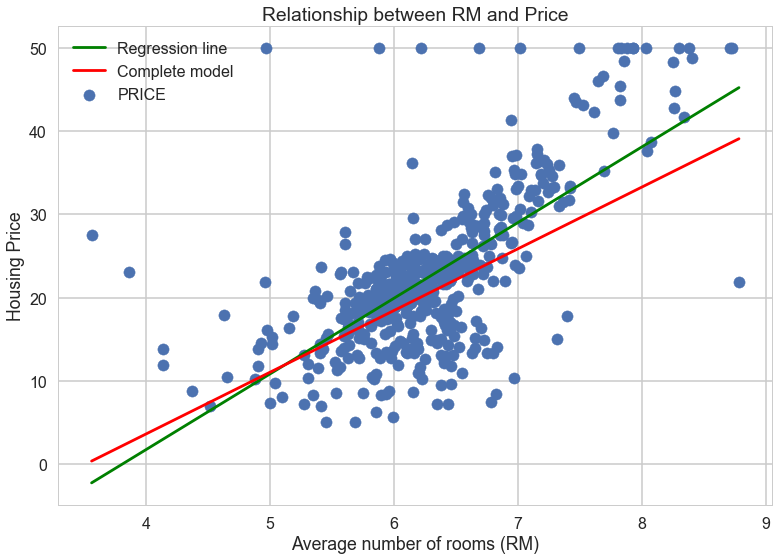

In [137]:
# RM
lm_RM = LinearRegression(normalize=True)
lm_RM.fit(bos[['RM']], bos.PRICE)

X = np.asarray([[np.min(bos.RM)],[np.max(bos.RM)]])
Y = lm_RM.predict(X)

Y_reg = [y_pred3[np.argmin(bos[['RM']].values)],y_pred3[np.argmax(bos[['RM']].values)]]

plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.plot(X,Y,color='green',label='Regression line')
plt.plot(X,Y_reg,color='red',label='Complete model')
plt.legend()

plt.show()

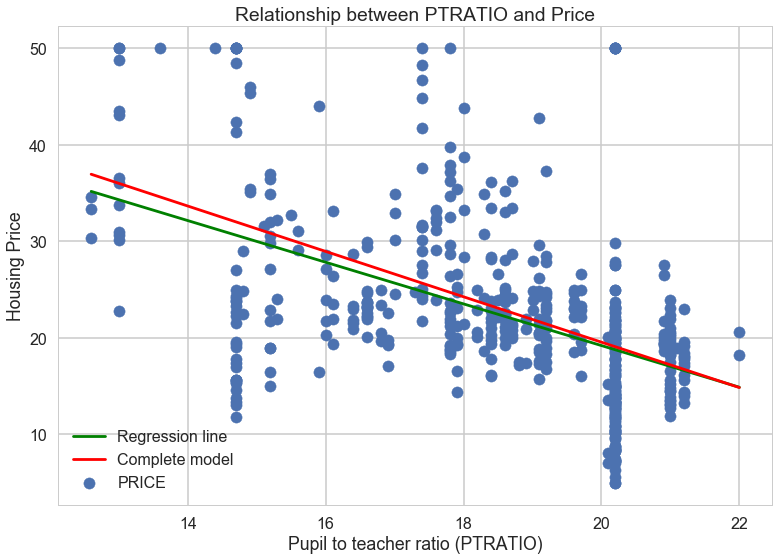

In [138]:
# PTRATIO
lm_PTRATIO = LinearRegression(normalize=True)
lm_PTRATIO.fit(bos[['PTRATIO']], bos.PRICE)

X = np.asarray([[np.min(bos.PTRATIO)],[np.max(bos.PTRATIO)]])
Y = lm_PTRATIO.predict(X)

Y_reg = [y_pred3[np.argmin(bos[['PTRATIO']].values)],y_pred3[np.argmax(bos[['PTRATIO']].values)]]

plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil to teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.plot(X,Y,color='green',label='Regression line')
plt.plot(X,Y_reg,color='red',label='Complete model')
plt.legend()

plt.show()

Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.
Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [147]:
# Remove outliers
bos_no_outliers = bos.copy()

# RM
bos_no_outliers = bos_no_outliers[np.abs(bos_no_outliers.RM-bos_no_outliers.RM.mean())<=(3*bos_no_outliers.RM.std())]
print(bos_no_outliers.shape)

# CRIM
bos_no_outliers = bos_no_outliers[np.abs(bos_no_outliers.CRIM-bos_no_outliers.CRIM.mean())<=(3*bos_no_outliers.CRIM.std())]
print(bos_no_outliers.shape)

# PTRATIO
bos_no_outliers = bos_no_outliers[np.abs(bos_no_outliers.PTRATIO-bos_no_outliers.PTRATIO.mean())<=(3*bos_no_outliers.PTRATIO.std())]
print(bos_no_outliers.shape)

(498, 14)
(490, 14)
(490, 14)


In [149]:
lm_final = LinearRegression(normalize=True)
lm_final.fit(bos_no_outliers[['CRIM', 'RM','PTRATIO']], bos_no_outliers.PRICE)

# Make prediction
y_pred_final = lm_final.predict(bos_no_outliers[['CRIM', 'RM','PTRATIO']])

# Compute the R^2 value
R2_final = r2_score(bos_no_outliers.PRICE.values,y_pred_final)
print('Previous R^2 score with outliers:',R2_3)
print("New R^2 score without outliers:",R2_final)

Previous R^2 score with outliers: 0.593414155114
New R^2 score without outliers: 0.616090314496


We were able to improve the accuracy of the model by removing the outiliers.

** Remove high-influence points **

**CRIM**  
Once the outliers have been removed, the only high influence points are the ones in red in the plot below

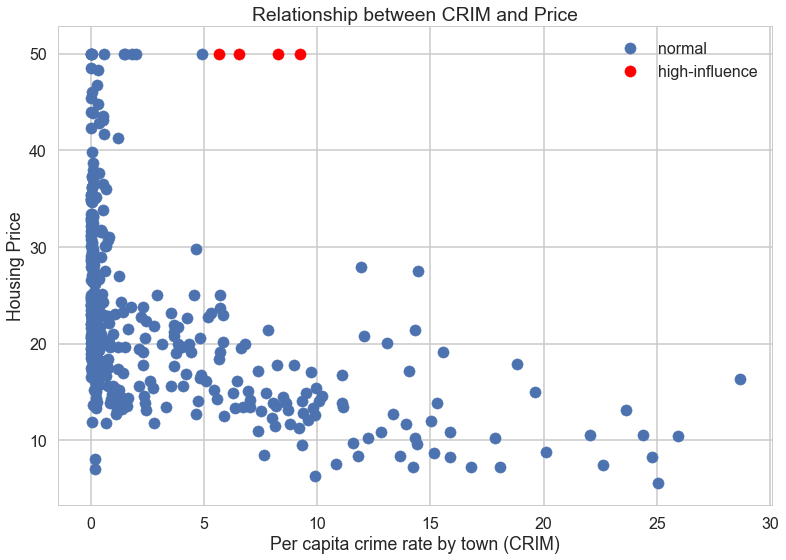

In [159]:
high_influence_CRIM = ((bos_no_outliers.PRICE==50) & (bos_no_outliers.CRIM>5))

plt.scatter(bos_no_outliers.CRIM[~high_influence_CRIM], 
            bos_no_outliers.PRICE[~high_influence_CRIM],
            label='normal')
plt.scatter(bos_no_outliers.CRIM[high_influence_CRIM], 
            bos_no_outliers.PRICE[high_influence_CRIM],color='red',
            label='high-influence')
plt.legend()
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show();

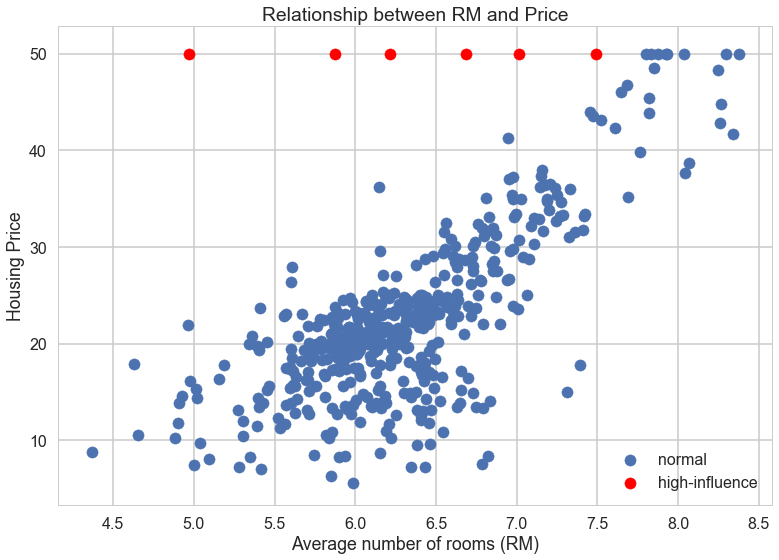

In [171]:
high_influence_RM = (((bos_no_outliers.PRICE==50) & (bos_no_outliers.RM<7.5)) |
                     ((bos_no_outliers.RM>8) & (bos_no_outliers.PRICE<30)))


plt.scatter(bos_no_outliers.RM[~high_influence_RM], 
            bos_no_outliers.PRICE[~high_influence_RM],
            label='normal')
plt.scatter(bos_no_outliers.RM[high_influence_RM], 
            bos_no_outliers.PRICE[high_influence_RM],color='red',
            label='high-influence')
plt.legend()
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show();

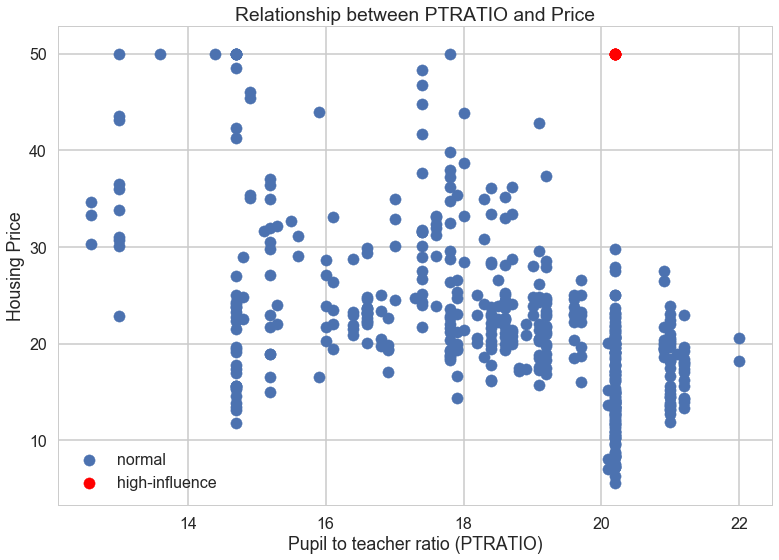

In [173]:
high_influence_PTRATIO = ((bos_no_outliers.PRICE==50) & (bos_no_outliers.PTRATIO>20))


plt.scatter(bos_no_outliers.PTRATIO[~high_influence_PTRATIO], 
            bos_no_outliers.PRICE[~high_influence_PTRATIO],
            label='normal')
plt.scatter(bos_no_outliers.PTRATIO[high_influence_PTRATIO], 
            bos_no_outliers.PRICE[high_influence_PTRATIO],color='red',
            label='high-influence')
plt.legend()

plt.xlabel("Pupil to teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show();

In [174]:
# Filter points of high-influence

mask = ~((high_influence_CRIM)&(high_influence_PTRATIO)&(high_influence_RM))
bos_filtered = bos_no_outliers.copy()

bos_filtered = bos_filtered[mask]
print(bos_filtered.shape)

(486, 14)


In [175]:
lm_final_2 = LinearRegression(normalize=True)
lm_final_2.fit(bos_filtered[['CRIM', 'RM','PTRATIO']], bos_filtered.PRICE)

# Make prediction
y_pred_final_2 = lm_final_2.predict(bos_filtered[['CRIM', 'RM','PTRATIO']])

# Compute the R^2 value
R2_final_2 = r2_score(bos_filtered.PRICE.values,y_pred_final_2)
print('Previous R^2 score with outliers:',R2_3)
print("New R^2 score without outliers:",R2_final)
print("New R^2 score without outliers and without high-influence points:",R2_final_2)

Previous R^2 score with outliers: 0.593414155114
New R^2 score without outliers: 0.616090314496
New R^2 score without outliers and without high-influence points: 0.683954194582


**CONCLUSION**  

We can see a real imporvement of the accuracy of the prediction after removing the outliers and the high-influence points.